<h1 style="color:green"> Fashion MNIST dataset ________________________ (Project 4) </h1>

<h2 style="color:purple"> Workflow Steps</h2>
<h3 style="color:orange">
    
1. Problem Definition
2. Import Libraries and Dependencies
3. Data Collection
4. Data Preparation
5. Data Visualization 
6. ML & DL Modeling
7. Evaluate & Test Model
8. Predict New Test Data
</h3>

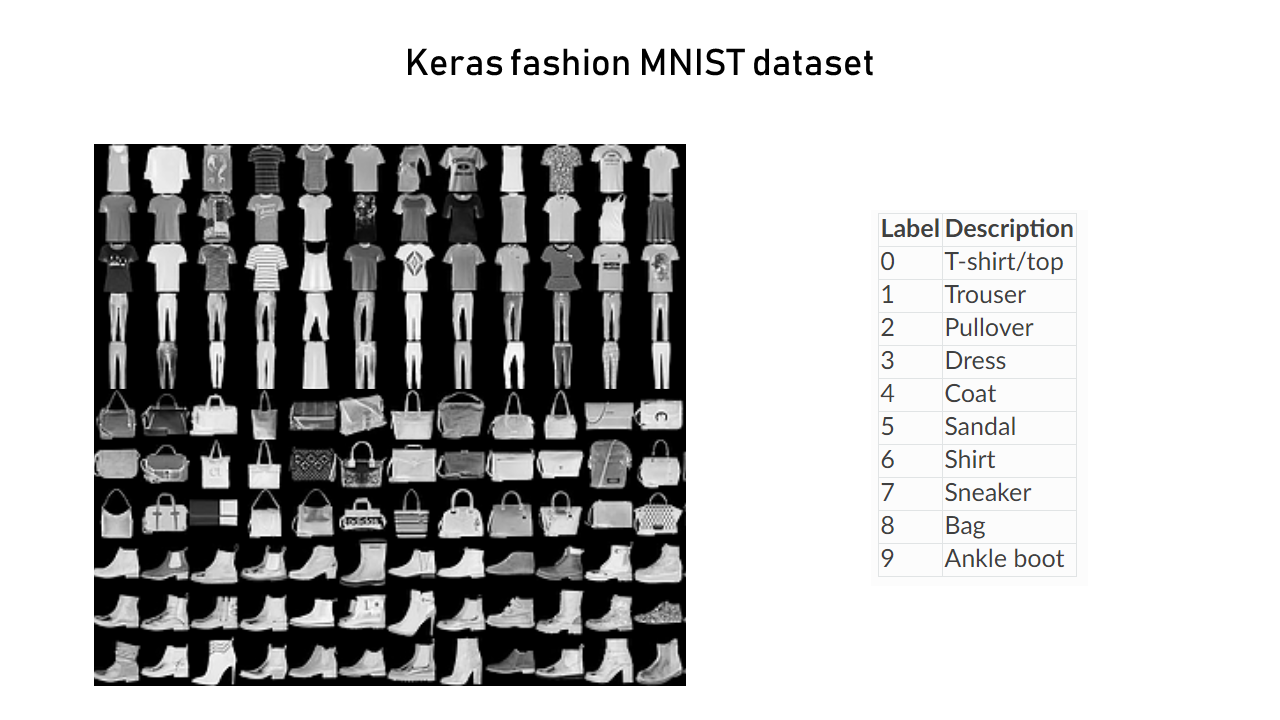

<h2 style="color:blue">1. Problem Definition</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**

<h2 style="color:blue">2. Import Libraries and Dependencies</h2>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf


In [2]:
keras.backend.backend()

'tensorflow'

<h2 style="color:blue">3. Data Collection</h2>

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

<h2 style="color:blue">4. Data Preparation</h2>

In [4]:
print(f"train data shape    :{x_train.shape}")
print(f"label data shape    :{y_train.shape}")
print(f"train data length   :{len(x_train)}")
print(f"y_train data length :{len(y_train)}")

train data shape    :(60000, 28, 28)
label data shape    :(60000,)
train data length   :60000
y_train data length :60000


In [5]:
# Normailize Data
x_train=x_train/255
x_test=x_test/255

<h2 style="color:blue">5. Data Visualization </h2>

In [ ]:
for i in range(5):
    plt.matshow(x_train[i])



In [ ]:
y_train[:5]

<h2 style="color:blue">6. ML & DL Modeling</h2>

In [7]:
from keras.layers import Flatten, Dense, Activation,Conv2D, MaxPool2D
from keras.models import Sequential

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation= 'relu', input_shape = (28,28,1)) )   
model.add(Conv2D(64, kernel_size = (3,3),activation= 'relu'))             
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten()) 
model.add(Dense(100,  activation='relu')) 
model.add(Dense(10,  activation= 'softmax'))
    


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 100)               921700    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3746 - accuracy: 0.8670
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2373 - accuracy: 0.9128
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1828 - accuracy: 0.9318
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1395 - accuracy: 0.9483
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1083 - accuracy: 0.9593


<h2 style="color:blue">7. Evaluate & Test Model</h2>

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2471 - accuracy: 0.9171


[0.24708053469657898, 0.9171000123023987]

In [12]:
y_predicted=model.predict(x_test)
result=np.array([np.argmax(y) for y in y_predicted])

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,result)
cm

array([[844,   1,   6,  17,   2,   1, 125,   0,   4,   0],
       [  2, 982,   0,  11,   0,   0,   5,   0,   0,   0],
       [ 18,   0, 829,   9,  70,   0,  73,   0,   1,   0],
       [ 10,   3,   9, 933,  17,   0,  28,   0,   0,   0],
       [  1,   0,  33,  31, 864,   0,  70,   0,   1,   0],
       [  0,   0,   0,   0,   0, 987,   0,  10,   0,   3],
       [ 77,   1,  31,  26,  48,   0, 813,   0,   4,   0],
       [  0,   0,   0,   0,   0,   7,   0, 971,   0,  22],
       [  2,   0,   4,   6,   0,   2,   7,   2, 977,   0],
       [  1,   0,   0,   0,   0,   8,   0,  20,   0, 971]], dtype=int64)

<AxesSubplot:>

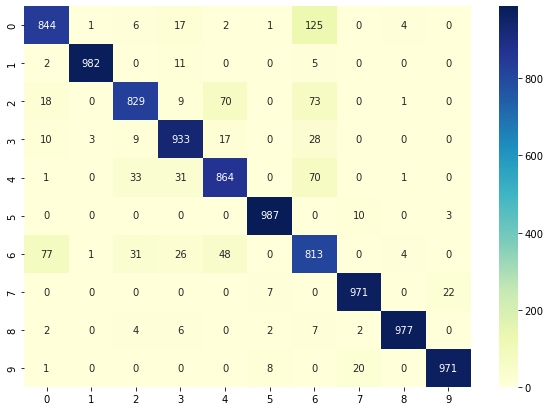

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7))
plt.xlabel("predicted value")
plt.ylabel("Trueth Value")
sn.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")


<h2 style="color:blue">8. Predict New Test Data</h2>

In [15]:
result[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [16]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)